<a href="https://colab.research.google.com/github/blessingodede/AIPND/blob/master/Balanced_Data_Set_SMOTEANDMain_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
data = pd.read_csv("/content/drive/My Drive/NF-UQ-NIDS.csv")

In [ ]:
data.head(n=5)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign,NF-UNSW-NB15
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign,NF-UNSW-NB15
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign,NF-UNSW-NB15
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign,NF-UNSW-NB15
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign,NF-UNSW-NB15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11994893 entries, 0 to 11994892
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   L7_PROTO                    float64
 6   IN_BYTES                    int64  
 7   OUT_BYTES                   int64  
 8   IN_PKTS                     int64  
 9   OUT_PKTS                    int64  
 10  TCP_FLAGS                   int64  
 11  FLOW_DURATION_MILLISECONDS  int64  
 12  Label                       int64  
 13  Attack                      object 
 14  Dataset                     object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.3+ GB


In [ ]:
data.isnull().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
Dataset                       0
dtype: int64

In [ ]:
data.shape

(11994893, 15)

In [ ]:
data['Attack'].value_counts()

Benign            9208048
DDoS               763285
Reconnaissance     482946
injection          468575
DoS                348962
Brute Force        291955
password           156299
xss                 99944
Infilteration       62072
Exploits            24736
scanning            21467
Fuzzers             19463
Backdoor            19029
Bot                 15683
Generic              5570
Analysis             1995
Theft                1909
Shellcode            1365
mitm                 1295
Worms                 153
ransomware            142
Name: Attack, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11994893 entries, 0 to 11994892
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   L7_PROTO                    float64
 6   IN_BYTES                    int64  
 7   OUT_BYTES                   int64  
 8   IN_PKTS                     int64  
 9   OUT_PKTS                    int64  
 10  TCP_FLAGS                   int64  
 11  FLOW_DURATION_MILLISECONDS  int64  
 12  Label                       int64  
 13  Attack                      object 
 14  Dataset                     object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.3+ GB


In [ ]:
data.isnull().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
Dataset                       0
dtype: int64

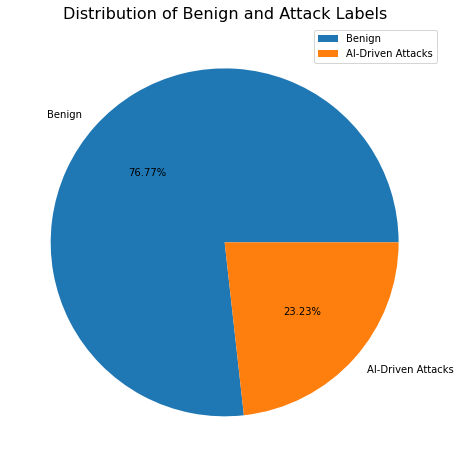

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.Label.value_counts(),labels=['Benign','AI-Driven Attacks'],autopct='%0.2f%%')
plt.title("Distribution of Benign and Attack Labels",fontsize=16)
plt.legend()
plt.show()

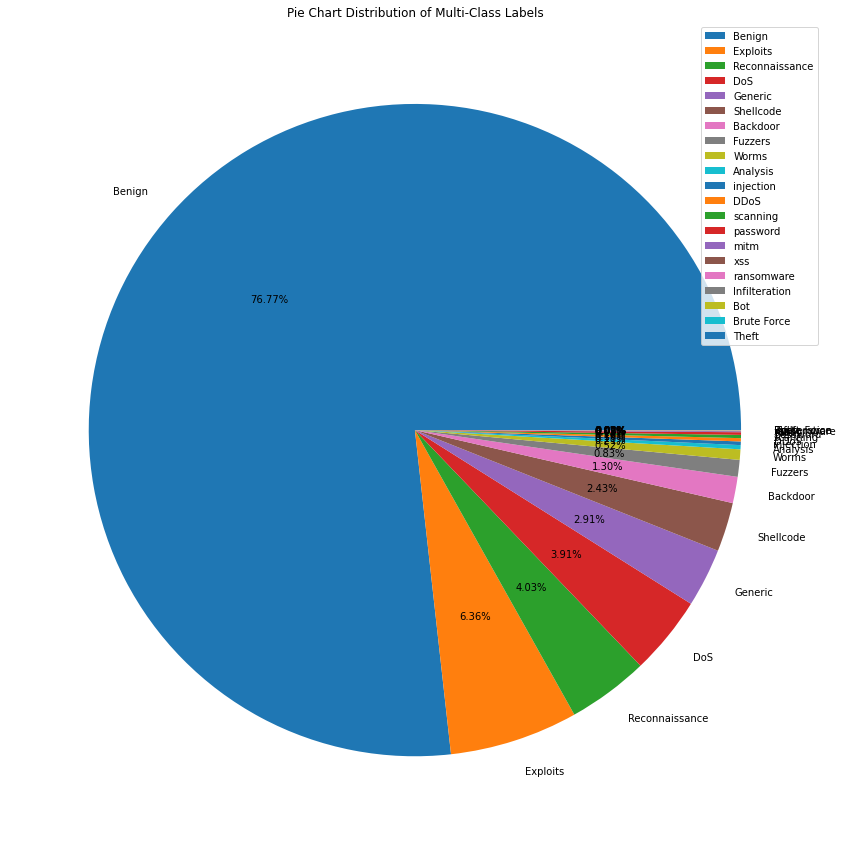

In [ ]:
plt.figure(figsize=(20,15))
plt.pie(data.Attack.value_counts(),labels=data.Attack.unique(),autopct='%0.2f%%')
plt.title('Pie Chart Distribution of Multi-Class Labels')
plt.legend(loc='best')
plt.show()

In [ ]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['Dataset', 'IPV4_DST_ADDR', 'IPV4_SRC_ADDR'], dtype='object')

In [ ]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,Dataset,IPV4_DST_ADDR,IPV4_SRC_ADDR
0,NF-UNSW-NB15,59.166.0.5,149.171.126.0
1,NF-UNSW-NB15,59.166.0.5,149.171.126.2
2,NF-UNSW-NB15,59.166.0.1,149.171.126.0
3,NF-UNSW-NB15,149.171.126.0,59.166.0.1
4,NF-UNSW-NB15,149.171.126.2,59.166.0.5


In [ ]:
data_cat = pd.get_dummies(data_cat,columns=cat_col, sparse=True)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data.shape

(11994893, 12)

In [ ]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('Label')
print(num_col)

['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']


In [ ]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# data before normalization
data.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,62073,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,32284,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,21,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,23800,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,63062,21,6,1.0,1786,2340,32,34,25,1459,0,Benign


In [ ]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [ ]:
# data after normalization
data.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,0.947173,0.855756,0.023529,0.000000,0.000042,1.710388e-06,0.000009,0.000006,0.112108,0.000003,0,Benign
1,0.492622,0.023285,0.023529,0.000000,0.000008,4.275970e-07,0.000005,0.000001,0.112108,0.000000,0,Benign
2,0.000320,0.335256,0.023529,0.003984,0.000008,5.081825e-06,0.000021,0.000016,0.112108,0.000259,0,Benign
3,0.363165,0.715541,0.023529,0.000000,0.000002,3.627996e-05,0.000008,0.000009,0.121076,0.000029,0,Benign
4,0.962264,0.000320,0.023529,0.003984,0.000008,9.620932e-06,0.000026,0.000025,0.112108,0.000340,0,Benign


In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.Label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['Label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['Label'] = enc_label

In [ ]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

In [ ]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.Attack)

In [ ]:
multi_data = pd.get_dummies(multi_data,columns=['Attack'])

In [ ]:
le2 = LabelEncoder()#use this encoder to encod
enc_label = le2.fit_transform(multi_data['Label'].values)
print(data.head())

   L4_SRC_PORT  L4_DST_PORT  ...  Label  Attack
0     0.947173     0.855756  ...      0  Benign
1     0.492622     0.023285  ...      0  Benign
2     0.000320     0.335256  ...      0  Benign
3     0.363165     0.715541  ...      0  Benign
4     0.962264     0.000320  ...      0  Benign

[5 rows x 12 columns]


In [ ]:
le2.classes_

array([0, 1])

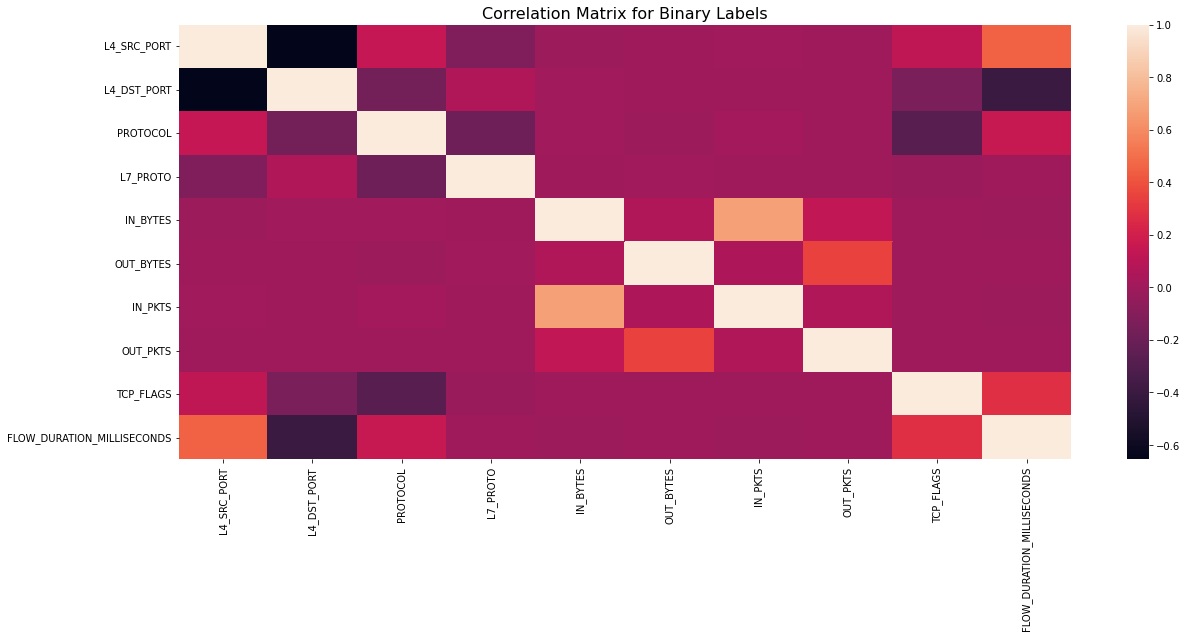

In [ ]:

# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

In [ ]:
#num_col = list(multi_data.select_dtypes(include='number').columns)

In [ ]:
# Correlation Matrix for Multi-class Labels
#plt.figure(figsize=(20,8))
#corr_multi = multi_data[num_col].corr()
#sns.heatmap(corr_multi,vmax=1.0,annot=False)
#plt.title('Correlation Matrix for Multi Labels',fontsize=16)
#plt.show()

In [ ]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
#corr_ymulti = abs(corr_multi['Label'])
#highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
#highest_corr_multi.sort_values(ascending=True)

In [ ]:
# selecting attributes found by using pearson correlation coefficient
#multi_cols = highest_corr_multi.index
#multi_cols

In [ ]:
# Multi-class labelled Dataset
#multi_data = multi_data[multi_cols].copy()

In [ ]:
#multi_data.to_csv('multi_data.csv')

In [ ]:
#X = bin_data.drop(columns=['Label'],axis=1)
#Y = bin_data['Label'].values
X = data.iloc[:, 0:10]
Y = data.iloc[:, 10]

In [ ]:
X.shape

(11994893, 10)

In [ ]:
Y.shape

(11994893,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

In [ ]:
dt_bin = DecisionTreeClassifier(random_state=123)
dt_bin.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [ ]:
y_pred = dt_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.01081293483782543
Mean Squared Error -  0.01081293483782543
Root Mean Squared Error -  0.10398526259920408
R2 Score -  93.93874685361513
Accuracy -  98.91870651621745


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99   2762321
      normal       0.98      0.97      0.98    836147

    accuracy                           0.99   3598468
   macro avg       0.99      0.98      0.98   3598468
weighted avg       0.99      0.99      0.99   3598468



In [ ]:
dt_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_bin_df.to_csv('dt_real_pred_bin.csv')
dt_bin_df

,Actual,Predicted
6911443,0,0
571060,1,1
11755859,1,1
5869345,0,0
5141793,0,0
...,...,...
4168824,0,0
4411330,0,0
2005988,1,1
1674877,1,1


In [ ]:

print('Training Set Accuracy: {:.4f}'.format(dt_bin.score(X_train, y_train)))

print('Testing Set Accuracy: {:.4f}'.format(dt_bin.score(X_test, y_test)))

Training Set Accuracy: 0.9980
Testing Set Accuracy: 0.9892


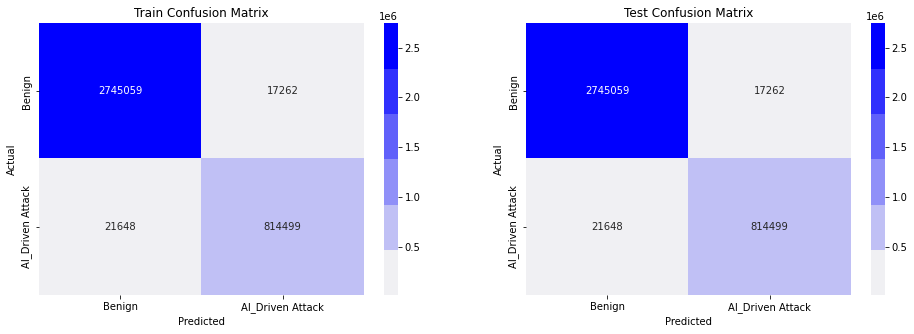

In [ ]:
 # Confusion martix of train and test
    # Train confusion matrix
from sklearn.metrics import confusion_matrix, make_scorer
cmap=sns.light_palette("blue")
labels= ['Benign', 'AI_Driven Attack']
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,y_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Train Confusion Matrix")

    # Test confusion matrix
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.show()

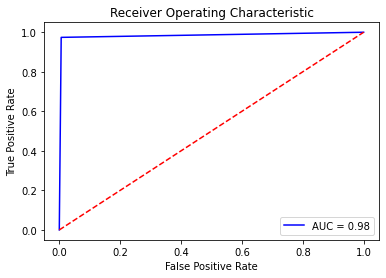

In [ ]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.gcf().savefig('roc.png')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.96')

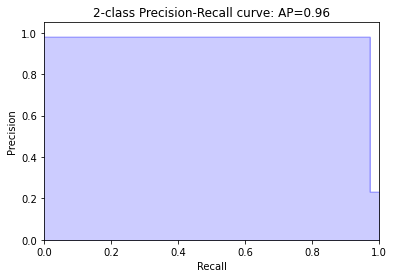

In [ ]:
from sklearn.metrics import precision_recall_curve
from inspect import signature
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

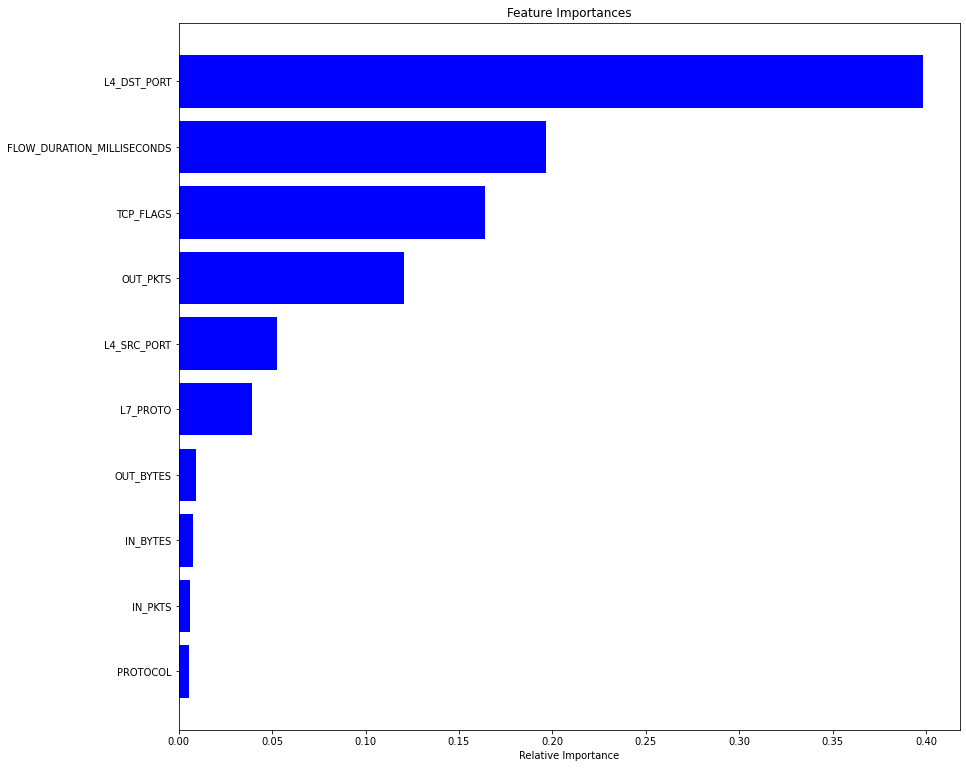

In [ ]:
importances = dt_bin.feature_importances_
indices = np.argsort(importances)
features = data.columns
plt.figure(1, figsize=(14, 13))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1950698
Before OverSampling, counts of label '0': 6445727 



In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
dt_bin = DecisionTreeClassifier(random_state=123)
dt_bin.fit(X_train_res, y_train_res.ravel())

In [ ]:
y_pred_new = dt_bin.predict(y_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred_new))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred_new))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred_new)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred_new)*100)
print("Accuracy - ",accuracy_score(y_test_res,y_pred_new)*100)

In [ ]:
 # Confusion martix of train and test
    # Train confusion matrix
from sklearn.metrics import confusion_matrix, make_scorer
cmap=sns.light_palette("blue")
labels= ['Benign', 'AI_Driven Attack']
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,y_pred_new),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Train Confusion Matrix")

    # Test confusion matrix
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_new),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.show()

In [ ]:
cls_report_new= classification_report(y_true=y_test, y_pred=y_pred_new,target_names=le1.classes_)
print(cls_report_new)

In [ ]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_new)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.gcf().savefig('roc.png')

In [ ]:
from sklearn.metrics import precision_recall_curve
from inspect import signature
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_new)
average_precision = average_precision_score(y_test, y_pred_new)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))